# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [4]:
boston = pd.read_csv('Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
boston.shape

(506, 15)

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

<AxesSubplot:>

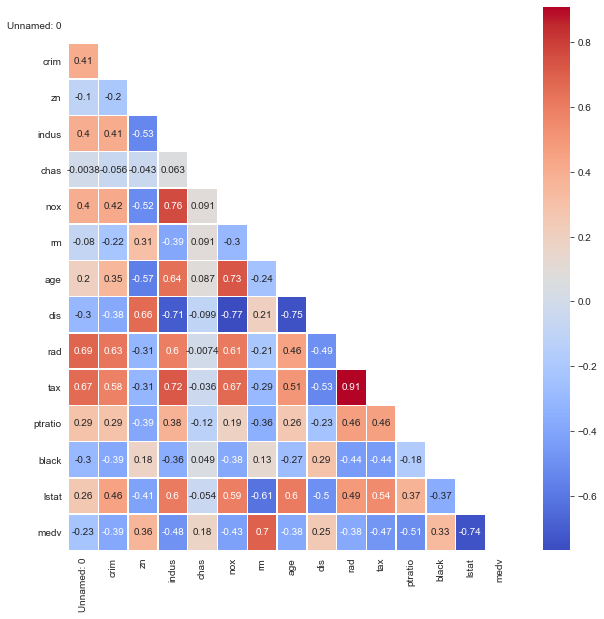

In [27]:
corr = boston.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, cmap = 'coolwarm', mask=mask, annot = True, linewidths=.5)

So 'rm' (= average rooms per dwelling) is highest positive correlation with median value of owner-occupied homes
'LSTAT' (= % lower status of the population) is lowest positive correlation with median value of owner-occupied homes

<AxesSubplot:xlabel='rm', ylabel='medv'>

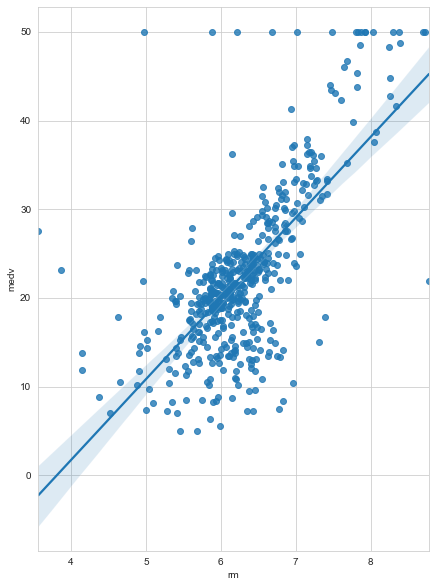

In [37]:
#highest positive correlation
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'rm', y = 'medv', data = boston, ax = ax)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

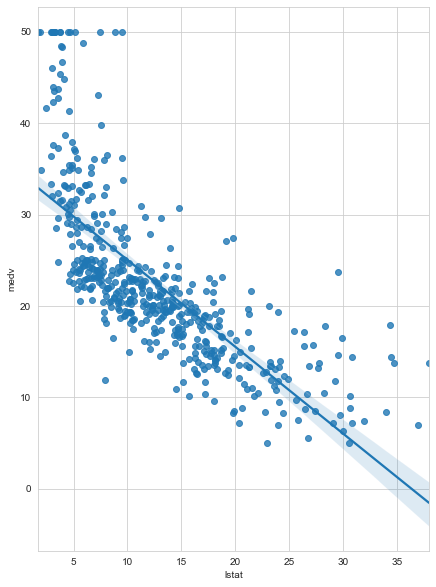

In [44]:
#highest negative correlation
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'lstat', y = 'medv', data = boston, ax = ax)

<AxesSubplot:xlabel='ptratio', ylabel='medv'>

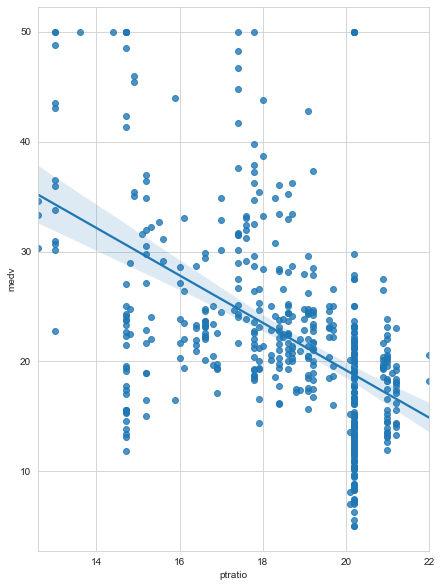

In [45]:
#medium correlation (pupil-teacher ratio by town)
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'ptratio', y = 'medv', data = boston, ax = ax)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

<AxesSubplot:xlabel='chas', ylabel='medv'>

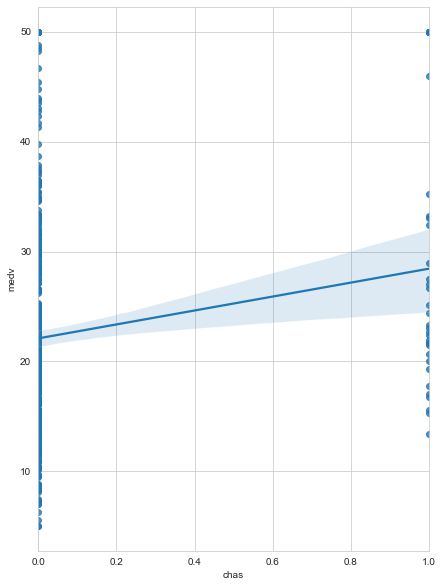

In [50]:
#example where there is very low correlation
fig, ax = plt.subplots(figsize=(7,10)) 
sns.regplot(x = 'chas', y = 'medv', data = boston, ax = ax)

In [48]:
#Higher average rooms per dwelling is higher house price
#The higher % lower status of the population the lower the house prices
#Both relationships can be expected

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [31]:
#oops, i already did a heatmap

#### Significant correlations


In [32]:
#see above

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [47]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [34]:
#your code here

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [35]:
#your code here

Now, plot the score for each tree on the training set and on the testing set.

In [36]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [37]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [38]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [40]:
#your code here

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [41]:
#your code here

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [42]:

#your code here

#### Create a function that calculates  and returns the r2 score as performance metric

In [43]:
#your code here

#### Calculate the r2 score of the model using the function defined above

In [44]:
#your code here

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [45]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [25]:
#Your response here
